In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [40]:
df = pd.read_csv('bank.csv')

In [41]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [42]:
df.shape

(11162, 17)

In [43]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [44]:
df = pd.get_dummies(df)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,5,1042,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,False,True
1,56,45,5,1467,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,False,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,55,2476,5,579,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,54,184,5,673,2,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,False,True


In [ ]:
df.head(10)

In [45]:
df['deposit'] = df['deposit_yes'].replace({'yes': 1, 'no': 0})

df.drop(['deposit_yes', 'deposit_no'], axis=1, inplace=True)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit'],
      dtype='object')

In [ ]:
X = df.drop('deposit', axis=1) 
y = df['deposit'] 
df.columns

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [49]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)
precision = precision_score(y_test,y_pred)
print('Precision: ',precision)
f1_score = f1_score(y_test,y_pred)
print('F1 score: ',f1_score)
recall = recall_score(y_test,y_pred)
print('Recall: ',recall)

Accuracy:  0.7847118542848611
Precision:  0.7733585858585859
F1 score:  0.7726269315673289
Recall:  0.7718966603654694


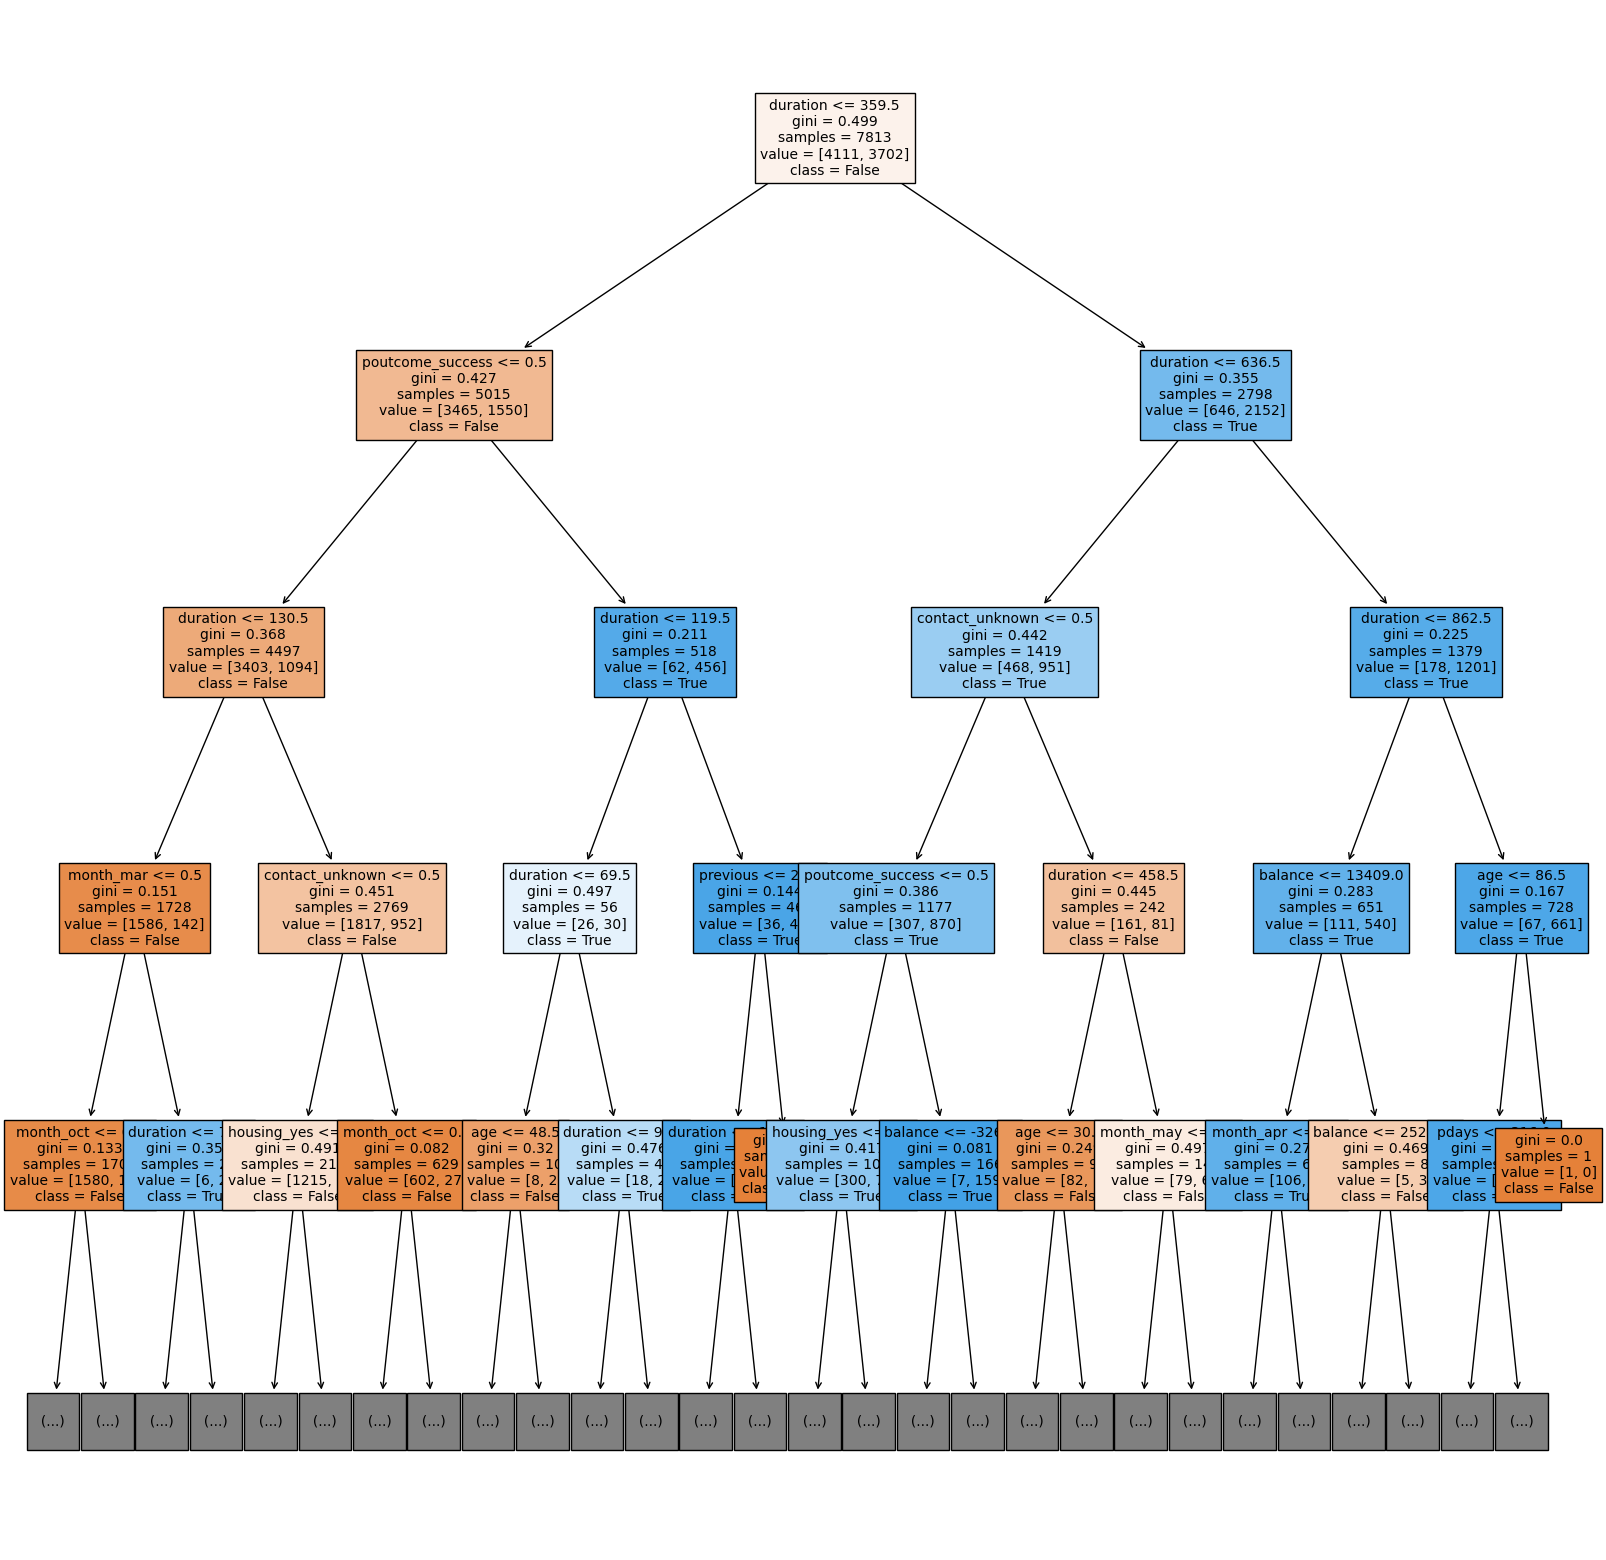

In [70]:
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=4, fontsize=10, feature_names=X.columns.tolist(),
          class_names=['False', 'True'], filled=True)
plt.show()